In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

import knntools

import warnings
warnings.filterwarnings('ignore')


In [3]:
tracks = pd.read_csv('../spotify_data.csv')

tracks['artist_name'] = tracks['artist_name'].str.strip().str.lower()
tracks['track_name'] = tracks['track_name'].str.strip().str.lower()


# print(tracks.columns.tolist())

tracks.drop_duplicates()
tracks.dropna()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,jason mraz,i won't give up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,jason mraz,93 million miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,joshua hyslop,do not let me go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,boyce avenue,fast car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,andrew belle,sky's still blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,nicola conte,black spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,nicola conte,quiet dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,amon tobin,morning ms candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,peace orchestra,happy christmas (war is over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [4]:
# One-Hot Encoding Approach (TOO MEMORY COSTLY)
# tracks = pd.get_dummies(tracks, columns=['artist_name', 'track_name'])

tracks = pd.get_dummies(tracks, columns=['genre'])


# Label Encoding
le_artist = LabelEncoder()
le_track = LabelEncoder()

tracks['artist_name'] = le_artist.fit_transform(tracks['artist_name'])
tracks['track_name'] = le_track.fit_transform(tracks['track_name'])

tracks = tracks.drop(columns=['track_id', 'Unnamed: 0'])

print('=========================================')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(tracks)

scaled_tracks = pd.DataFrame(scaled_features, columns=tracks.columns)

for i in tracks.columns.tolist():
    if "genre" in i:
        print(i)


genre_acoustic
genre_afrobeat
genre_alt-rock
genre_ambient
genre_black-metal
genre_blues
genre_breakbeat
genre_cantopop
genre_chicago-house
genre_chill
genre_classical
genre_club
genre_comedy
genre_country
genre_dance
genre_dancehall
genre_death-metal
genre_deep-house
genre_detroit-techno
genre_disco
genre_drum-and-bass
genre_dub
genre_dubstep
genre_edm
genre_electro
genre_electronic
genre_emo
genre_folk
genre_forro
genre_french
genre_funk
genre_garage
genre_german
genre_gospel
genre_goth
genre_grindcore
genre_groove
genre_guitar
genre_hard-rock
genre_hardcore
genre_hardstyle
genre_heavy-metal
genre_hip-hop
genre_house
genre_indian
genre_indie-pop
genre_industrial
genre_jazz
genre_k-pop
genre_metal
genre_metalcore
genre_minimal-techno
genre_new-age
genre_opera
genre_party
genre_piano
genre_pop
genre_pop-film
genre_power-pop
genre_progressive-house
genre_psych-rock
genre_punk
genre_punk-rock
genre_rock
genre_rock-n-roll
genre_romance
genre_sad
genre_salsa
genre_samba
genre_sertanejo
gen

In [7]:
k = 6

knn = NearestNeighbors(n_neighbors=k, algorithm='auto')
knn.fit(scaled_tracks)

same_artist_count = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
}

same_genre_count = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
}

for _ in range(100):
    # input_song_name = input("Enter a song name: \n")
    # input_artist_name = input("Who is it by?\n")

    # input_song = knntools.find_song(
    #     input_artist_name.strip().lower(),
    #     input_song_name.strip().lower(),
    #     tracks,
    #     le_artist,
    #     le_track
    # )

    input_song = knntools.get_random_song(tracks, le_artist, le_track)

    if isinstance(input_song, str):
        print("Song not found")

    else:
        num_same_artist = 0
        num_same_genre = 0
        # Retrieve the actual songs
        # input_song_dict = input_song.iloc[0].to_dict()
        input_song_dict = input_song

        genre_columns = [col for col in tracks.columns if 'genre_' in col]
        genre = [col.replace('genre_', '') for col in genre_columns if input_song_dict[col] == 1][0]
        
        artist = input_song_dict['artist_name']

        # print(artist, genre)

        similar_songs = knntools.find_similar_songs(input_song_dict, tracks, knn, scaler, le_artist, le_track)
        # print("Here's a few songs I recommend you listen to!")
        # print("=============================================")
        i = True
        for index, row in similar_songs.iterrows():
            # Lazy way of running first iteration on separate logic, doing this because knn returns original song too.
            if i:
                i = False
            else:
                new_genre = [col.replace('genre_', '') for col in genre_columns if input_song_dict[col] == 1][0]
                # print(f"'{row['track_name']}', by {row['artist_name']}, {genre}\n")

                num_same_artist += artist == row['artist_name']
                num_same_genre += genre == new_genre

        # print(f"{num_same_genre = }, {num_same_artist = }")
        
        same_artist_count[num_same_artist] += 1
        same_genre_count[num_same_genre] += 1






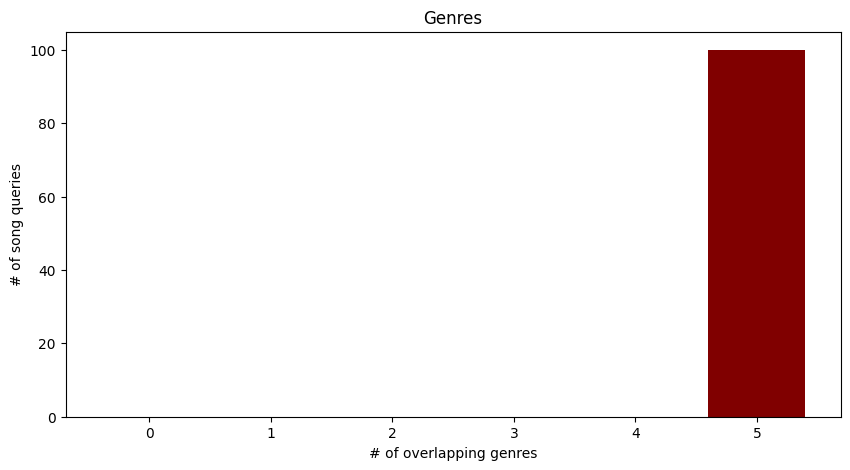

In [8]:
same_genre_keys = list(same_genre_count.keys())
same_genre_vals = list(same_genre_count.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(same_genre_keys, same_genre_vals, color='maroon')

plt.xlabel("# of overlapping genres")
plt.ylabel("# of song queries")
plt.title("Genres")
plt.show()

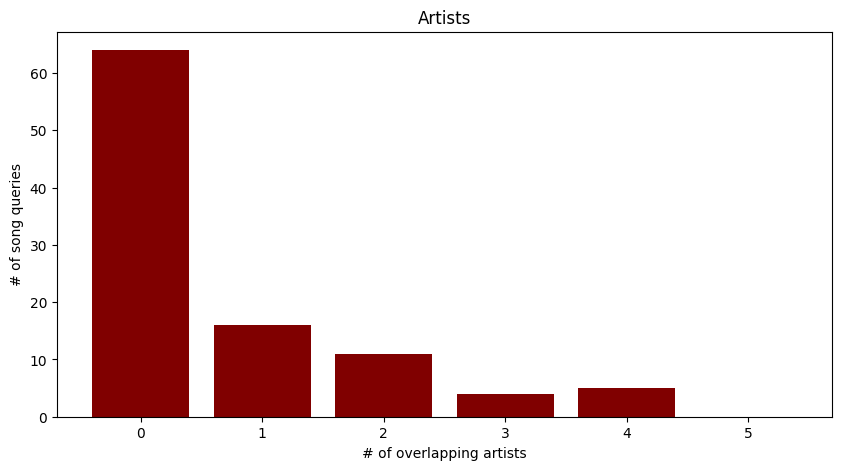

In [9]:

same_artist_keys = list(same_artist_count.keys())
same_artist_vals = list(same_artist_count.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(same_artist_keys, same_artist_vals, color='maroon')

plt.xlabel("# of overlapping artists")
plt.ylabel("# of song queries")
plt.title("Artists")
plt.show()